In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


np.random.seed(123)

# Working with distributions in SciPy

In [3]:
die_distribution = stats.randint(1, 7)

## Random Values

In [4]:
die_distribution.rvs()

# Will provide a single random value

6

In [5]:
die_distribution.rvs(5)

# Will provide the specified amount of random values 

array([3, 5, 3, 2, 4])

In [6]:
die_distribution.rvs((5, 5))

# Will provide the specified amount of arrays of the specified amount of random values 

array([[3, 4, 2, 2, 1],
       [2, 2, 1, 1, 2],
       [4, 6, 5, 1, 1],
       [5, 2, 4, 3, 5],
       [3, 5, 1, 6, 1]])

Text(0.5, 1.0, 'Outcome of 10,000 Dice Rolls')

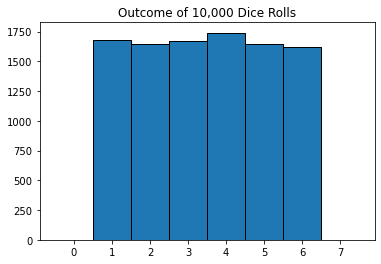

In [7]:
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')

# since the odds are even for each number, the distribution should be almost even

## PMF / PDF

In [8]:
die_distribution.pmf(3)

## probability mass function will provide the odds of specified outcome

0.16666666666666666

In [9]:
die_distribution.pmf([1, 2, 3])

## you can calculate multiple outcomes at once 

array([0.16666667, 0.16666667, 0.16666667])

## CDF / PPF

In [10]:
die_distribution.cdf(3)

## cumulative density function will provide the odds of an outcome less than or equal to the specified outcome

0.5

In [11]:
die_distribution.ppf(5/6)

## percent point function (ppf) will provide the outcome associated with a specified probability (lower than)

5.0

## SF / ISF

In [12]:
die_distribution.sf(4)

## survival function (sf) will provide the odds of the outcome being higher than the specified outcome

## also equivalent to 1 - (die_distribution.cdf(4))

0.33333333333333337

In [13]:
die_distribution.isf(1/3)

## inverse survival function (isf) will provide the outcome associated with the specified probablity (high than)

4.0

# Binomial Distribution

## You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

In [15]:
stats.binom(30, .25).sf(10)

## binomial means 2 outcomes, in this case the outcomes are you got the answer right or you got the answer wrong

## 30 questions, 25% chance of randomly getting an answer correct, what are the odds you got 10 correct?

0.10572812269266013

## Suppose there is a 5% chance that a Codeup student will show up late to class. With a class of 20, what is the likelihood that everyone shows up on time?

In [16]:
stats.binom(20, .05).pmf(0)

## 2 outcomes, either a student is late, or they are on time

## 20 students, 5% chance each student will be late, what are the odds that no one is late?

0.3584859224085422

# Normal Distribution

## Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

In [17]:
μ = 12000
# median

σ = 2000
# standard deviation

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


## How likely is it that the store sells less than 10,000 dollars one day?

In [18]:
p = sales.cdf(10_000)

print(f'Ony any given day, there\'s a {p:.1%} chance we sell less than $10,000.')

Ony any given day, there's a 15.9% chance we sell less than $10,000.


# Poisson Distribution

## Codeup knows that, on average, students consume 5 lbs of coffee per week. How likely is it that the coffee consumption for this week is only 3 lbs?

In [19]:
stats.poisson(5).pmf(3)

## the average is 5, the possibility it technically infinate, what is the odds it is only 3?

0.1403738958142805

In [20]:
stats.poisson(5).sf(7)

## what are the odds more than 7 lbs are consumed?

0.13337167407000744